In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat

In [7]:
%run ../Limpezas/limpeza_oferta_demanda.ipynb
%run ../Limpezas/limpeza_analise_energetica.ipynb
%run ../Limpezas/limpeza_socioeconomia.ipynb

In [8]:
eletr = dict_oferta_demanda['Eletricidade']
prima = dict_analise_energetica['Produção_de_Energia_Primária']
oftin = dict_analise_energetica['Oferta_Interna_de_Energia']
dic_s = dict_dfs

In [27]:
plt.cm._colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [39]:
def plotall(dado, tamanho=(8,8)):
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = tamanho
    plt.minorticks_on()
    df = dict_oferta_demanda[dado]
    n = len(df.columns.values)
    ax.set_prop_cycle('color', plt.cm.nipy_spectral(np.linspace(0,1,n)))
    for i in df.columns:
        plt.plot(df['ANO'], df[i], label=i)
    plt.legend(bbox_to_anchor=(1.1,0.9))
    plt.grid(which='both', alpha=0.5)
    plt.show()

# Consumo de eletricidade

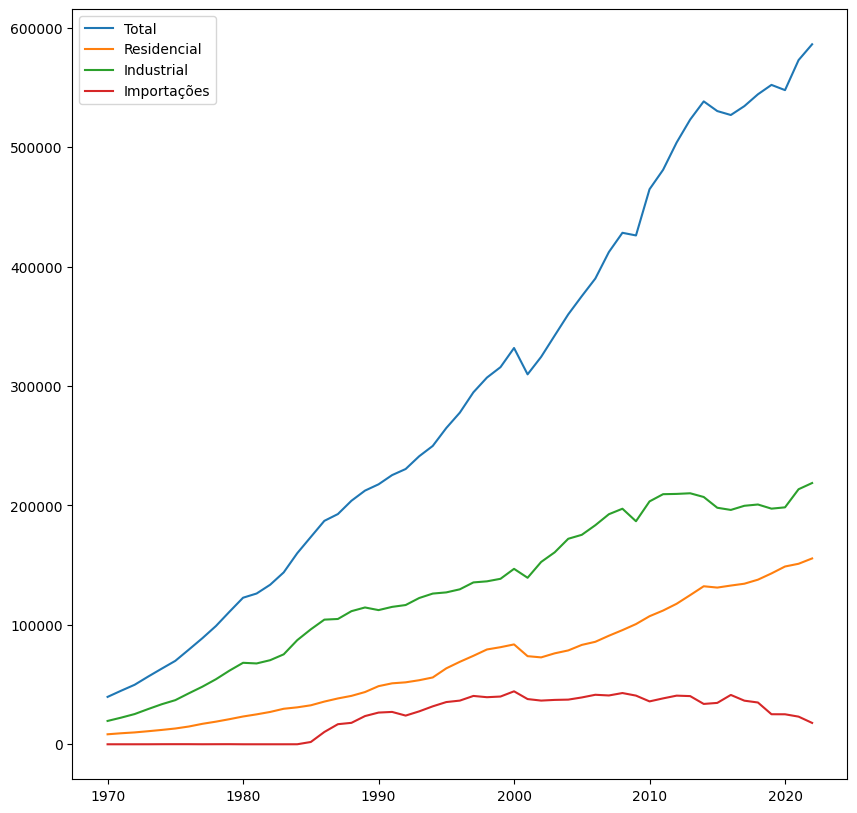

In [10]:
plt.plot(eletr['ANO'], eletr['CONSUMO FINAL'], label='Total')
plt.plot(eletr['ANO'], eletr['RESIDENCIAL'], label='Residencial')
plt.plot(eletr['ANO'], eletr['INDUSTRIAL'], label='Industrial')
plt.plot(eletr['ANO'], eletr['IMPORTAÇÃO'], label='Importações')
plt.legend()
plt.show()

# Fontes primárias de energia

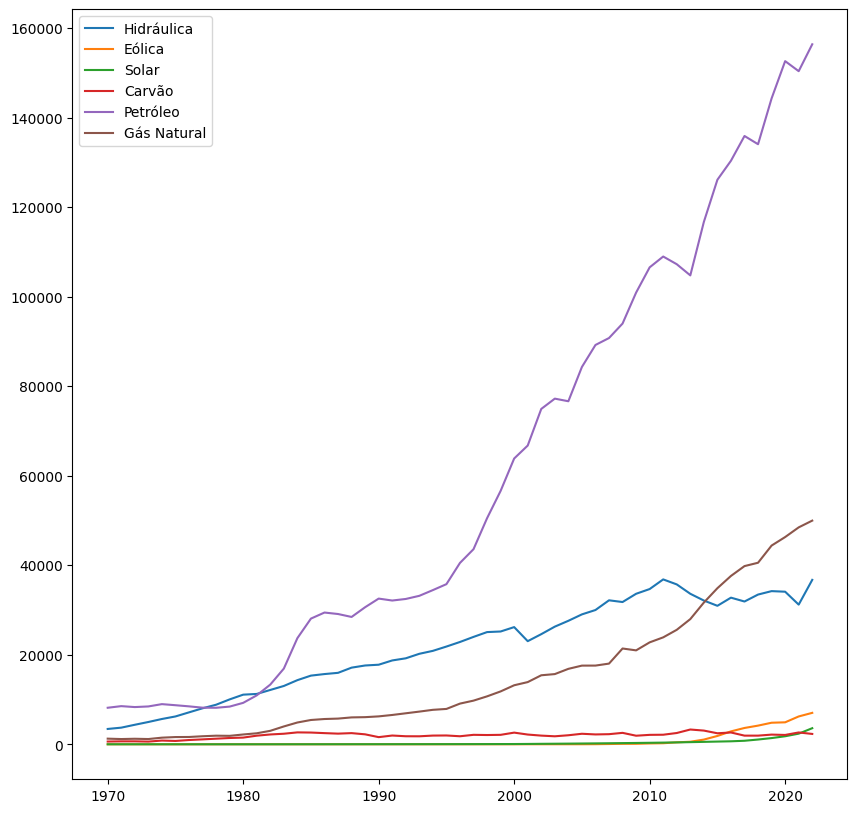

In [11]:
plt.plot(prima['ANO'], prima['ENERGIA HIDRÁULICA'], label='Hidráulica')
plt.plot(prima['ANO'], prima['EÓLICA'], label='Eólica')
plt.plot(prima['ANO'], prima['SOLAR¹'], label='Solar')
plt.plot(prima['ANO'], prima['CARVÃO VAPOR'], label='Carvão')
plt.plot(prima['ANO'], prima['PETRÓLEO'], label='Petróleo')
plt.plot(prima['ANO'], prima['GÁS NATURAL'], label='Gás Natural')
plt.legend()
plt.show()

# Oferta interna de energia

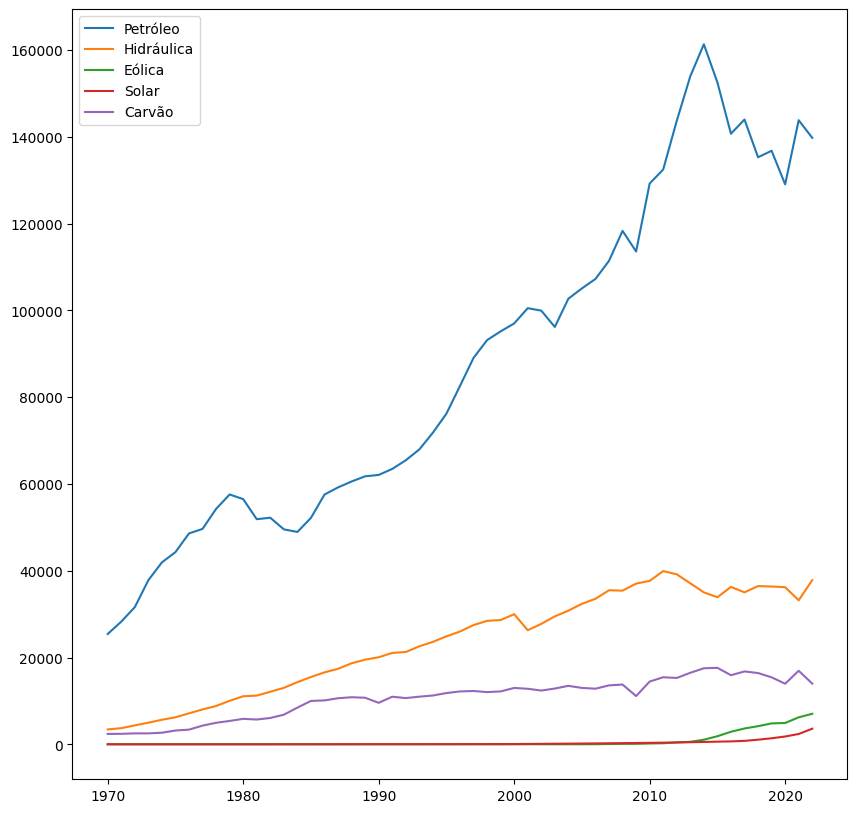

In [12]:
plt.plot(oftin['ANO'], oftin['PETRÓLEO, GÁS NATURAL E DERIVADOS'], label='Petróleo')
plt.plot(oftin['ANO'], oftin['HIDRÁULICA E ELETRICIDADE'], label='Hidráulica')
plt.plot(oftin['ANO'], oftin['EÓLICA'], label='Eólica')
plt.plot(oftin['ANO'], oftin['SOLAR'], label='Solar')
plt.plot(oftin['ANO'], oftin['CARVÃO MINERAL E DERIVADOS'], label='Carvão')
plt.legend()
plt.show()

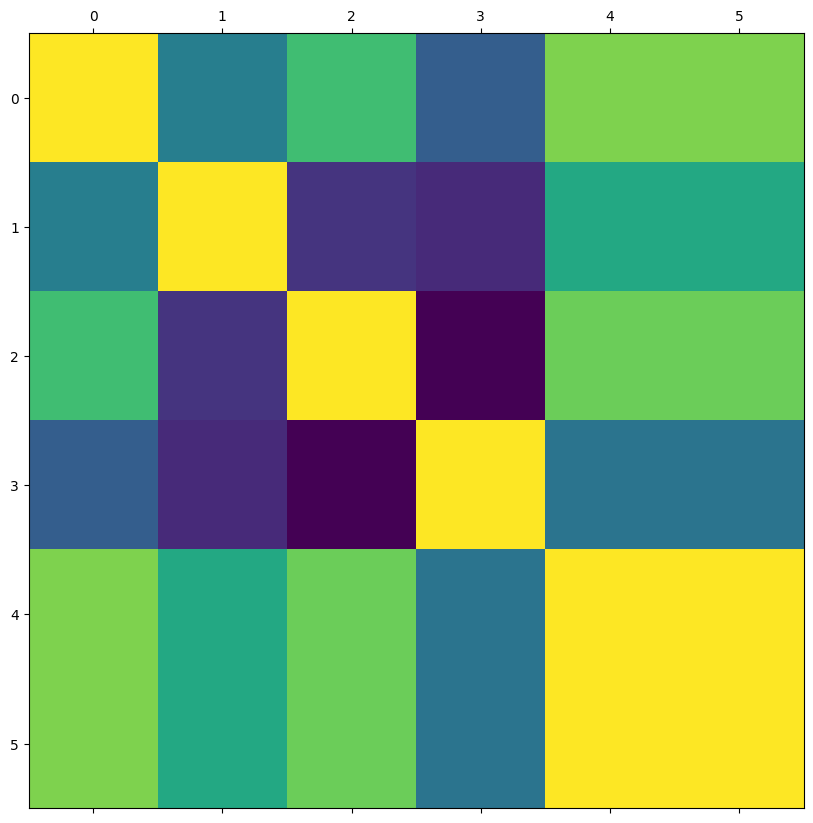

In [13]:
plt.matshow(dict_oferta_demanda['Urânio'].corr())
plt.show()

In [14]:
dict_oferta_demanda['Urânio'].corr()

,ANO,PRODUÇÃO,IMPORTAÇÃO,"VARIAÇÃO DE ESTOQUES, PERDAS E AJUSTES",CONSUMO TOTAL,TRANSFORMAÇÃO1
ANO,1.000000,0.334752,0.645143,0.186854,0.775880,0.775880
PRODUÇÃO,0.334752,1.000000,0.011804,-0.024863,0.538094,0.538094
IMPORTAÇÃO,0.645143,0.011804,1.000000,-0.161738,0.736884,0.736884
"VARIAÇÃO DE ESTOQUES, PERDAS E AJUSTES",0.186854,-0.024863,-0.161738,1.000000,0.283377,0.283377
CONSUMO TOTAL,0.775880,0.538094,0.736884,0.283377,1.000000,1.000000
TRANSFORMAÇÃO1,0.775880,0.538094,0.736884,0.283377,1.000000,1.000000


In [15]:
for i in dict_oferta_demanda:
    print(i)
    # plt.plot(dict_oferta_demanda[i])

Fontes_Primárias
Petróleo
Gás_Natural
Carvão_Vapor
Carvão_Metalúrgico
Energia_Hidráulica
Energia_Eólica
Energia_Solar_Fotovoltaica
Energia_Solar_Térmica
Urânio
Lenha
Caldo_de_Cana
Melaço
Bagaço_de_Cana
Lixívia
Outras_Fontes_Primárias
Total_de_Fontes_Secundárias
Derivados_de_Petróleo_e_Gás_Natural
Óleo_Diesel_Total
Diesel_de_Petróleo
Biodiesel
Óleo_Combustível
Gasolina
Gás_Liquefeito_de_Petróleo
Nafta
Coque_de_Carvão_Mineral
Querosene
Gás_de_Cidade
Gás_de_Coqueria
Eletricidade
Carvão_Vegetal
Álcool_Etílico_Total
Álcool_Anidro
Álcool_Hidratado
Outras_Secundárias_de_Petróleo
Alcatrão
Produtos_não_Energéticos_de_Petróleo


## Exibição dos dados de 'Fontes_Primárias'

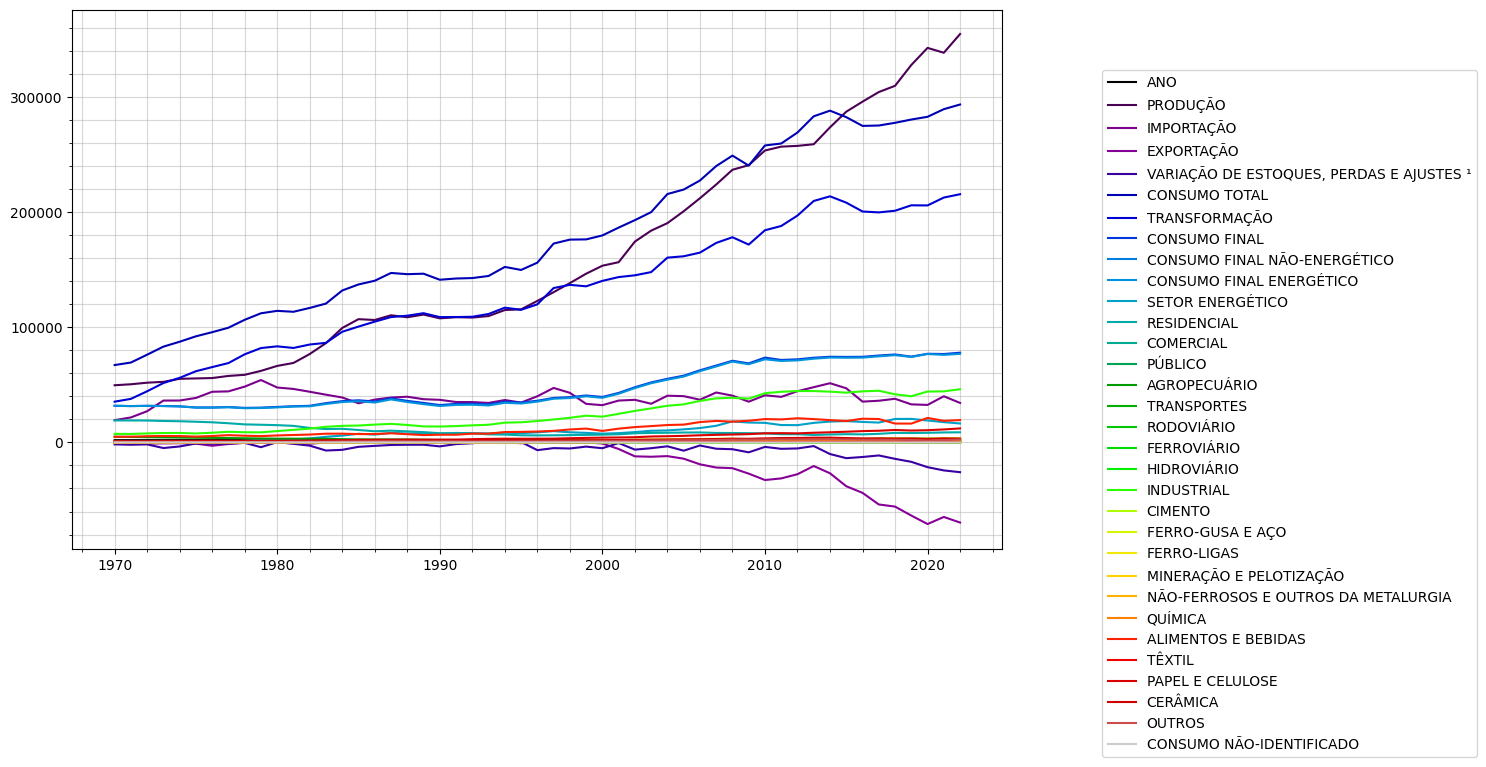

In [42]:
plotall('Fontes_Primárias', (10,10))

## Exibição dos dados de Petróleo

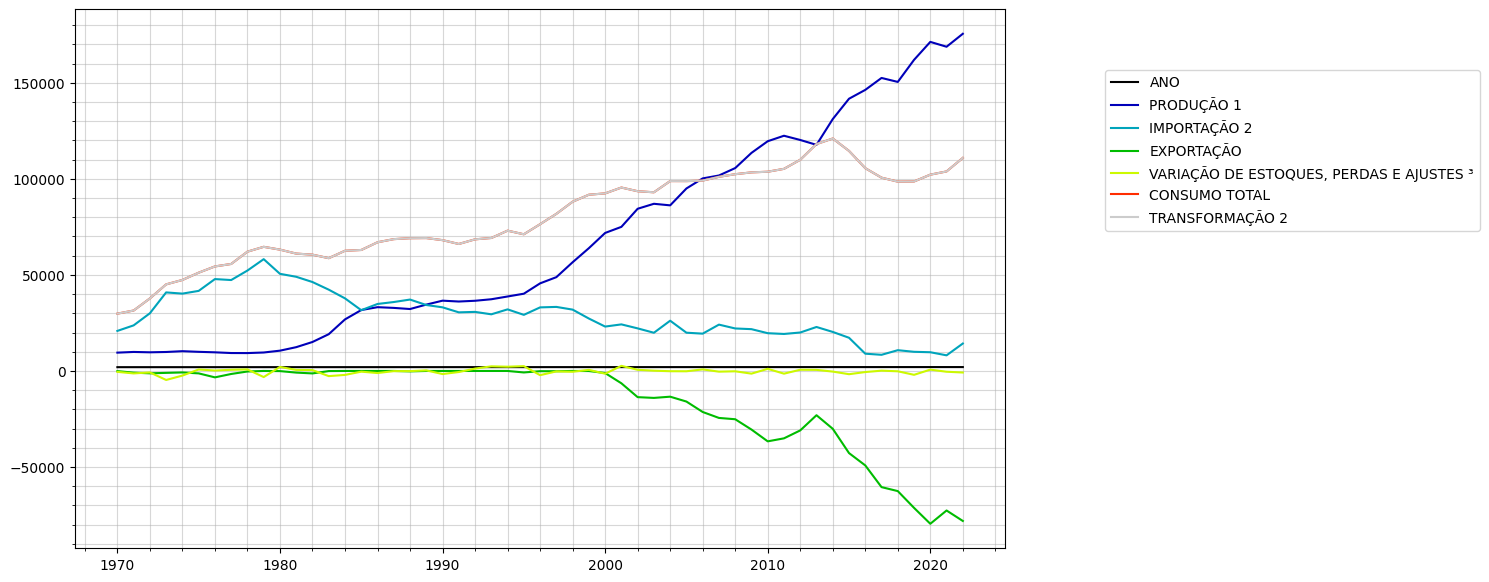

In [41]:
plotall('Petróleo', (12,7))

## Exibição dos dados de gás natural

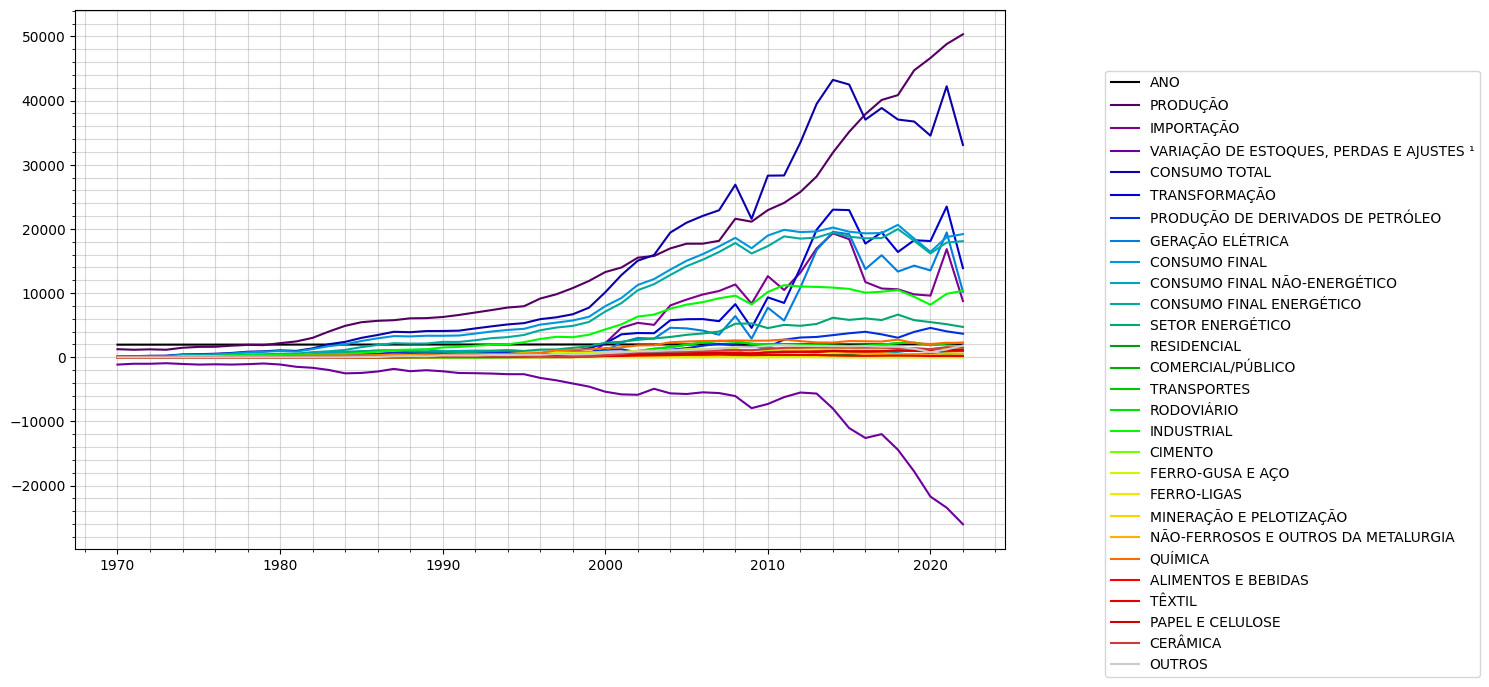

In [40]:
plotall('Gás_Natural', (12,7))

## Exibição dos dados de Lenha

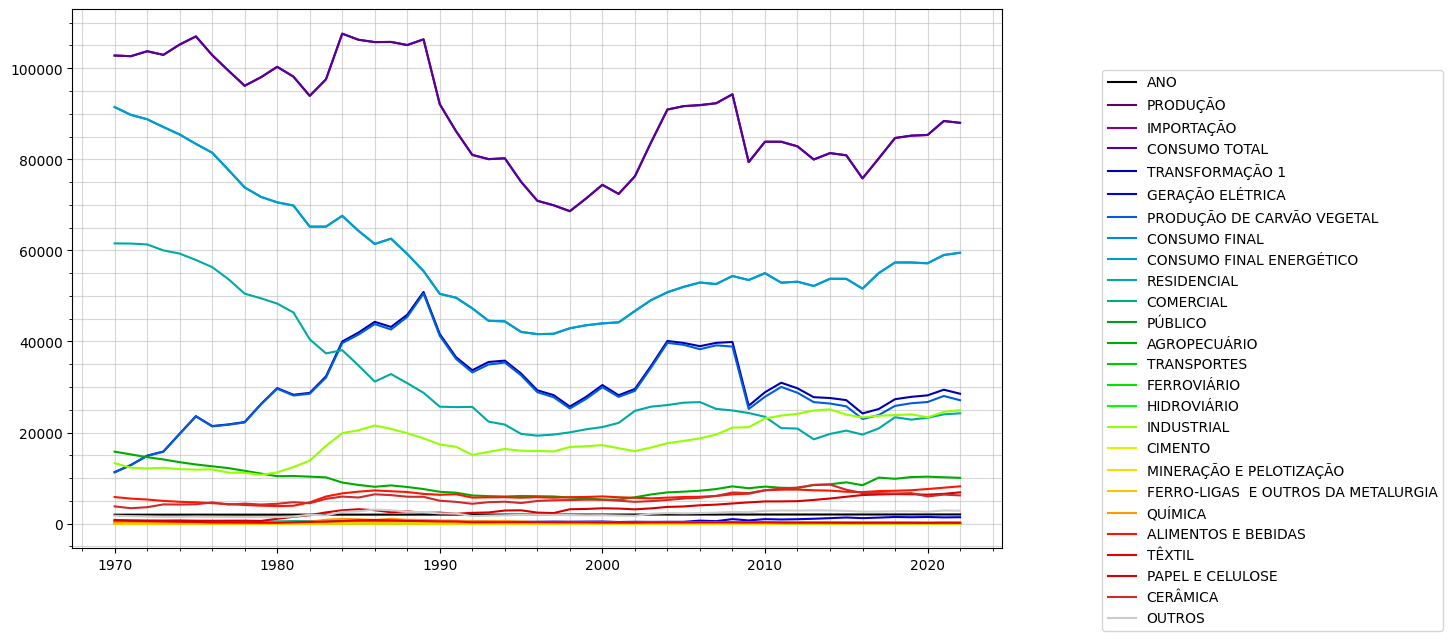

In [44]:
plotall('Lenha', (12,7))

## Dados Carvão_Vegetal

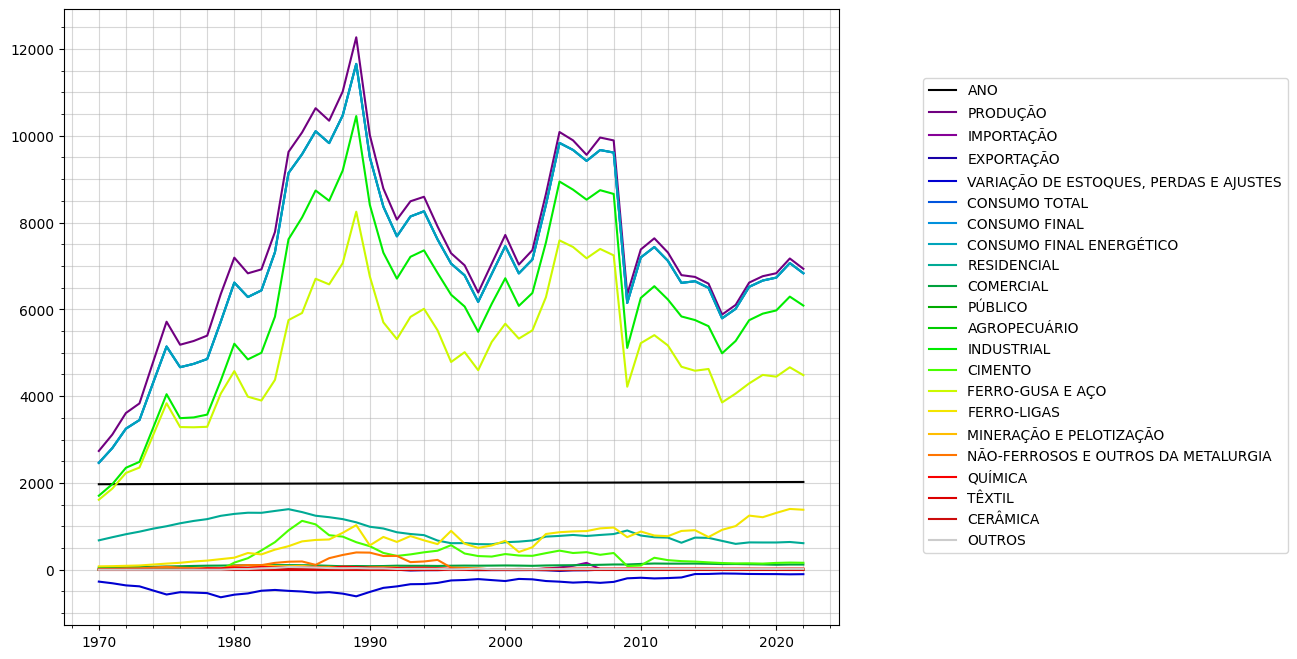

In [47]:

plotall('Carvão_Vegetal', (10, 8))